## Простая линейная регрессия с sklearn

#### Импортируем библиотеки

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression as LR

#### Загружаем данные

In [9]:
data = pd.read_csv('1.01. Simple linear regression (1).csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Создаем регрессию

#### Задаем зависимую и независимую переменную

In [10]:
y = data['GPA']
x = data['SAT']

In [11]:
 x.shape

(84,)

In [12]:
y.shape

(84,)

In [16]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

### Регрессия

In [20]:
reg = LR()

In [21]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### R-квадрат

In [27]:
reg.score(x_matrix,y)

0.40600391479679765

### Коэффициенты

In [28]:
reg.coef_

array([0.00165569])

### Пересечение

In [29]:
reg.intercept_

0.2750402996602803

### Прогноз

In [35]:
new_array = np.array(1740).reshape(-1,1)
reg.predict(new_array)

array([3.15593751])

In [36]:
new_data = pd.DataFrame(data = [1740,1760], columns = ['SAT'])
new_data

,SAT
0,1740
1,1760


In [37]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [38]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


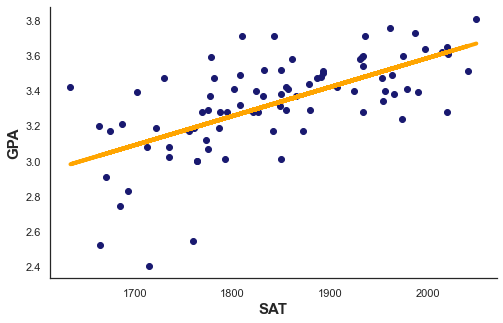

In [41]:
sns.set_style('white')
plt.figure(figsize = (8,5))
plt.scatter(x, y, color = 'midnightblue')
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,
               yhat,
               lw = 4,
               c = 'orange',
               label = 'regression line')
plt.xlabel('SAT', fontsize = 15, fontweight = 'bold')
plt.ylabel('GPA', fontsize = 15, fontweight = 'bold')
sns.despine()
plt.show()